In [19]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, RandomFlip, RandomBrightness, RandomContrast, Rescaling,
    Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

In [20]:
# --- PARÂMETROS ---
dataset_dir = 'dataset/'
img_size = 224
seed = 1000
n_splits = 5
batch_size = 32
epochs = 30

In [21]:
image_paths = []
labels = []
class_names = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
class_map = {name: i for i, name in enumerate(class_names)}

print(f"Classes encontradas: {class_map}")

for class_name, class_idx in class_map.items():
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.png', '.jpg')):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_idx)

image_paths = np.array(image_paths)
labels = np.array(labels)

Classes encontradas: {'bleached_corals': 0, 'healthy_corals': 1}


In [22]:
def create_model():
    data_augmentation = Sequential([
        RandomFlip(mode="horizontal", seed=seed),
        RandomBrightness(factor=0.2, seed=seed),
        RandomContrast(factor=0.2, seed=seed)
    ])

    model = Sequential([
        Input(shape=(img_size, img_size, 3)),
        data_augmentation,
        Rescaling(1./255),
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=256, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=512, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=512, activation="relu", kernel_initializer="he_normal"),
        Dropout(0.2),
        Dense(units=256, activation="relu", kernel_initializer="he_normal"),
        Dropout(0.2),
        Dense(units=128, activation="relu", kernel_initializer="he_normal"),
        Dense(units=1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=[
            BinaryAccuracy(name='accuracy'),
            Precision(name='precision'),
            Recall(name='recall')
        ]
    )
    return model

Carregando o dataset


In [23]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [img_size, img_size])
    image.set_shape([img_size, img_size, 3])
    return image, label

Parâmetros K-Fold


In [24]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

Lista de métricas


In [25]:
acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []
total_cm = np.zeros((len(class_names), len(class_names)))


--- Fold 1/5 ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6247 - loss: 3.3962 - precision: 0.6054 - recall: 0.6108 - val_accuracy: 0.5731 - val_loss: 4.4712 - val_precision: 0.5821 - val_recall: 0.3277
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.7014 - loss: 2.1161 - precision: 0.6832 - recall: 0.6988 - val_accuracy: 0.6640 - val_loss: 1.9162 - val_precision: 0.6771 - val_recall: 0.5462
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.6744 - loss: 2.2041 - precision: 0.6153 - recall: 0.6765 - val_accuracy: 0.6047 - val_loss: 1.6160 - val_precision: 0.6338 - val_recall: 0.3782
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 992ms/step - accuracy: 0.6823 - loss: 1.8248 - precision: 0.6612 - recall: 0.6740 - val_accuracy: 0.7312 - val_loss: 1.3001 - val_precision: 0.7179 - val_recall: 0.7059
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 992ms/step - accuracy: 0.7310 - loss: 1.2747 - precision: 0.6960 - recall: 0.7488 - val_accuracy: 0

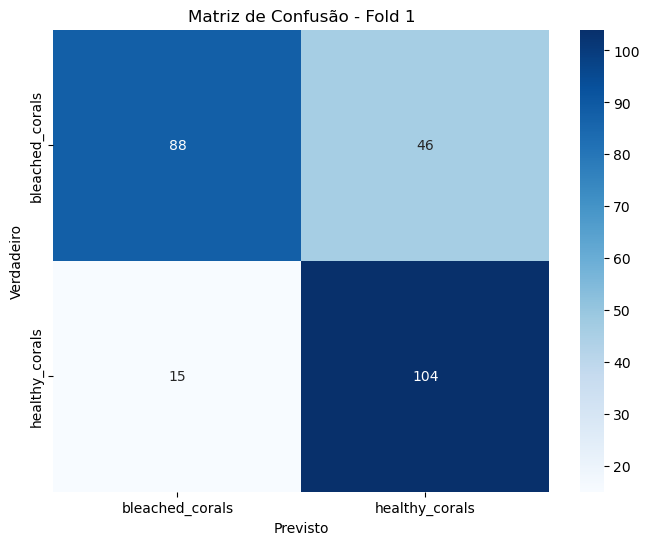


--- Fold 2/5 ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6660 - loss: 2.9522 - precision: 0.6187 - recall: 0.6229 - val_accuracy: 0.5257 - val_loss: 6.4559 - val_precision: 0.4667 - val_recall: 0.0588
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6747 - loss: 2.0367 - precision: 0.6626 - recall: 0.6770 - val_accuracy: 0.5534 - val_loss: 7.1341 - val_precision: 0.8000 - val_recall: 0.0672
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 982ms/step - accuracy: 0.6780 - loss: 2.0218 - precision: 0.6739 - recall: 0.6438 - val_accuracy: 0.6285 - val_loss: 2.1729 - val_precision: 0.9310 - val_recall: 0.2269
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 982ms/step - accuracy: 0.7338 - loss: 1.5151 - precision: 0.7538 - recall: 0.7120 - val_accuracy: 0.5415 - val_loss: 3.0666 - val_precision: 1.0000 - val_recall: 0.0252
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 980ms/step - accuracy: 0.7265 - loss: 1.4128 - precision: 0.7401 - recall: 0.6542 - val_accuracy: 0.63

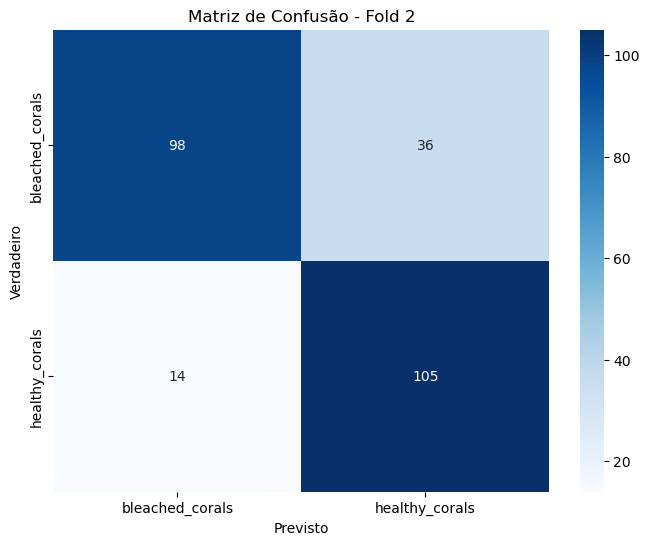


--- Fold 3/5 ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6353 - loss: 3.8001 - precision: 0.6033 - recall: 0.6064 - val_accuracy: 0.6601 - val_loss: 3.5818 - val_precision: 0.6486 - val_recall: 0.6050
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 984ms/step - accuracy: 0.6563 - loss: 2.8218 - precision: 0.6352 - recall: 0.5759 - val_accuracy: 0.5375 - val_loss: 10.7232 - val_precision: 1.0000 - val_recall: 0.0168
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 983ms/step - accuracy: 0.6876 - loss: 2.0608 - precision: 0.6789 - recall: 0.6381 - val_accuracy: 0.5652 - val_loss: 5.3917 - val_precision: 0.7647 - val_recall: 0.1092
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 989ms/step - accuracy: 0.7262 - loss: 1.3799 - precision: 0.7409 - recall: 0.6781 - val_accuracy: 0.6285 - val_loss: 1.9150 - val_precision: 0.9630 - val_recall: 0.2185
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 986ms/step - accuracy: 0.7379 - loss: 1.0438 - precision: 0.7028 - recall: 0.7231 - val_accuracy: 

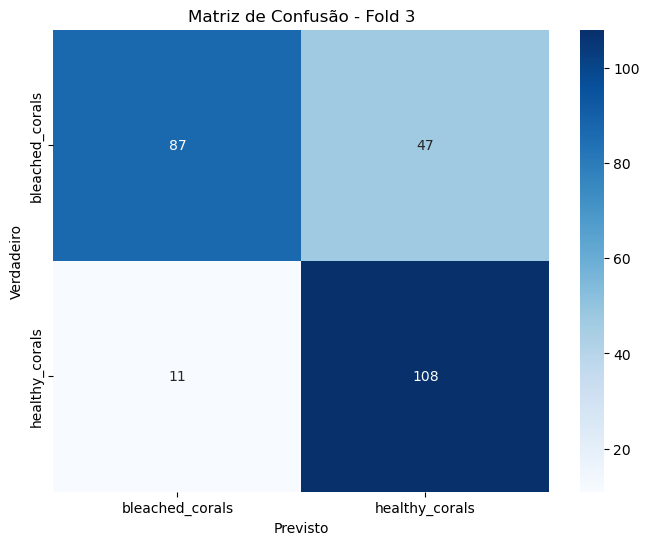


--- Fold 4/5 ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 997ms/step - accuracy: 0.6106 - loss: 4.3124 - precision: 0.5870 - recall: 0.5696 - val_accuracy: 0.6482 - val_loss: 5.5659 - val_precision: 0.8571 - val_recall: 0.3025
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 983ms/step - accuracy: 0.6701 - loss: 2.3077 - precision: 0.6574 - recall: 0.6700 - val_accuracy: 0.5415 - val_loss: 10.0776 - val_precision: 0.8000 - val_recall: 0.0336
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 991ms/step - accuracy: 0.6544 - loss: 2.1833 - precision: 0.6457 - recall: 0.6558 - val_accuracy: 0.5731 - val_loss: 3.3436 - val_precision: 0.9231 - val_recall: 0.1008
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 983ms/step - accuracy: 0.6563 - loss: 2.0138 - precision: 0.6254 - recall: 0.6312 - val_accuracy: 0.5494 - val_loss: 2.8815 - val_precision: 0.8571 - val_recall: 0.0504
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7140 - loss: 1.3181 - precision: 0.6822 - recall: 0.6922 - val_accuracy: 

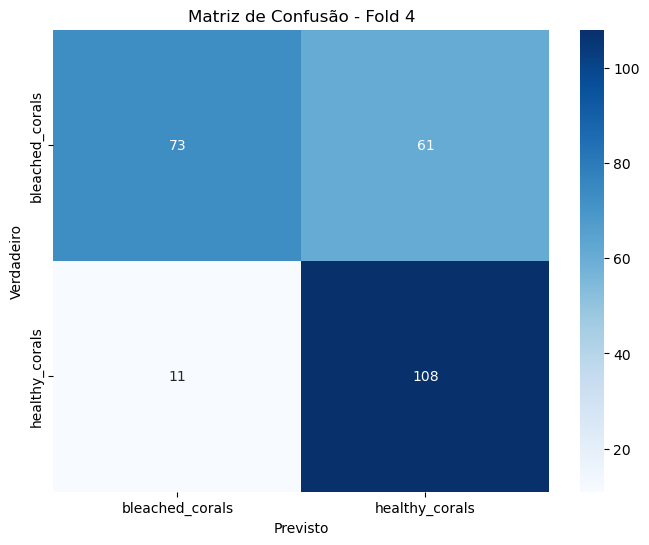


--- Fold 5/5 ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 999ms/step - accuracy: 0.6470 - loss: 3.1278 - precision: 0.6082 - recall: 0.6274 - val_accuracy: 0.6957 - val_loss: 1.6188 - val_precision: 0.6272 - val_recall: 0.8833
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7018 - loss: 2.8901 - precision: 0.6709 - recall: 0.6828 - val_accuracy: 0.5020 - val_loss: 1.7976 - val_precision: 0.4805 - val_recall: 0.6167
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6921 - loss: 2.0368 - precision: 0.6520 - recall: 0.6915 - val_accuracy: 0.6561 - val_loss: 1.1481 - val_precision: 0.6737 - val_recall: 0.5333
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 986ms/step - accuracy: 0.6602 - loss: 1.9429 - precision: 0.6603 - recall: 0.5960 - val_accuracy: 0.6877 - val_loss: 1.0543 - val_precision: 0.7470 - val_recall: 0.5167
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 989ms/step - accuracy: 0.6984 - loss: 1.4463 - precision: 0.6876 - recall: 0.7038 - val_accuracy: 0.60

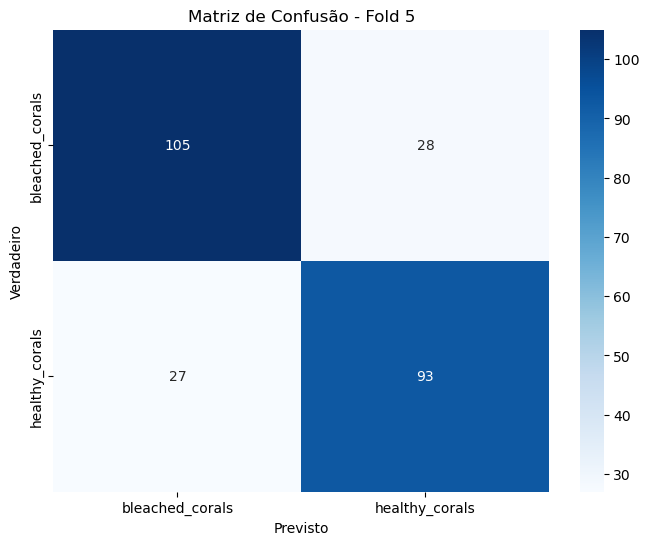

In [26]:
for fold, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels)):
    print(f"\n--- Fold {fold+1}/{n_splits} ---")

    train_paths, val_paths = image_paths[train_idx], image_paths[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
    val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

    train_ds = (train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
                .shuffle(buffer_size=len(train_paths))
                .batch(batch_size)
                .prefetch(tf.data.AUTOTUNE))
    val_ds = (val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
              .batch(batch_size)
              .prefetch(tf.data.AUTOTUNE))

    model = create_model()
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)

    scores = model.evaluate(val_ds, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])
    precision_per_fold.append(scores[2])
    recall_per_fold.append(scores[3])

    precision = scores[2]
    recall = scores[3]
    f1 = 2 * (precision * recall) / (precision + recall + 1e-7)
    f1_per_fold.append(f1)

    print(f"Score for fold {fold+1}: Loss={scores[0]:.4f}; Accuracy={scores[1]:.4f}; Precision={precision:.4f}; Recall={recall:.4f}; F1-Score={f1:.4f}")

    y_pred_probs = model.predict(val_ds)
    y_pred = (y_pred_probs > 0.5).astype("int32")

    y_true = np.concatenate([y for x, y in val_ds], axis=0)

    cm = confusion_matrix(y_true, y_pred)
    total_cm += cm

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - Fold {fold+1}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()


Resultados Finais da Validação Cruzada K-Folds
Acurácia: Média=0.7660 (+/- 0.0291)
Precisão: Média=0.7085 (+/- 0.0450)
Recall: Média=0.8693 (+/- 0.0490)
F1-Score: Média=0.7782 (+/- 0.0191)
Loss: Média=0.5581 (+/- 0.0315)


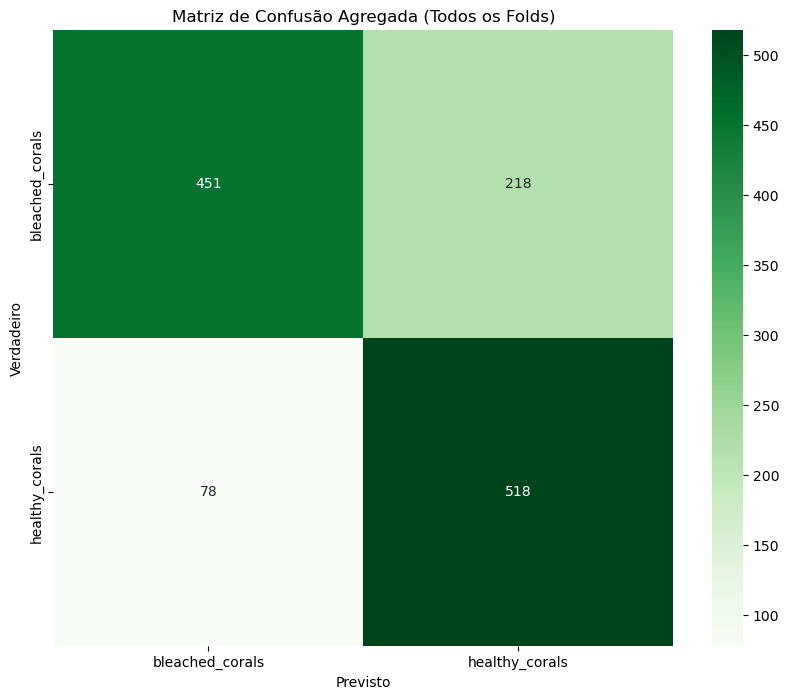

In [28]:
print("\n" + "="*50)
print("Resultados Finais da Validação Cruzada K-Folds")
print("="*50)

def print_metric_summary(name, values):
    mean = np.mean(values)
    std = np.std(values)
    print(f"{name}: Média={mean:.4f} (+/- {std:.4f})")

print_metric_summary("Acurácia", acc_per_fold)
print_metric_summary("Precisão", precision_per_fold)
print_metric_summary("Recall", recall_per_fold)
print_metric_summary("F1-Score", f1_per_fold)
print_metric_summary("Loss", loss_per_fold)

plt.figure(figsize=(10, 8))
sns.heatmap(total_cm.astype(int), annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão Agregada (Todos os Folds)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()